In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [67]:
from sklearn.datasets import load_boston

In [68]:
data = load_boston(return_X_y=False)

In [75]:
data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [72]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [79]:
df = pd.DataFrame(
    data=data['data'],
    columns=data['feature_names'])

In [90]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


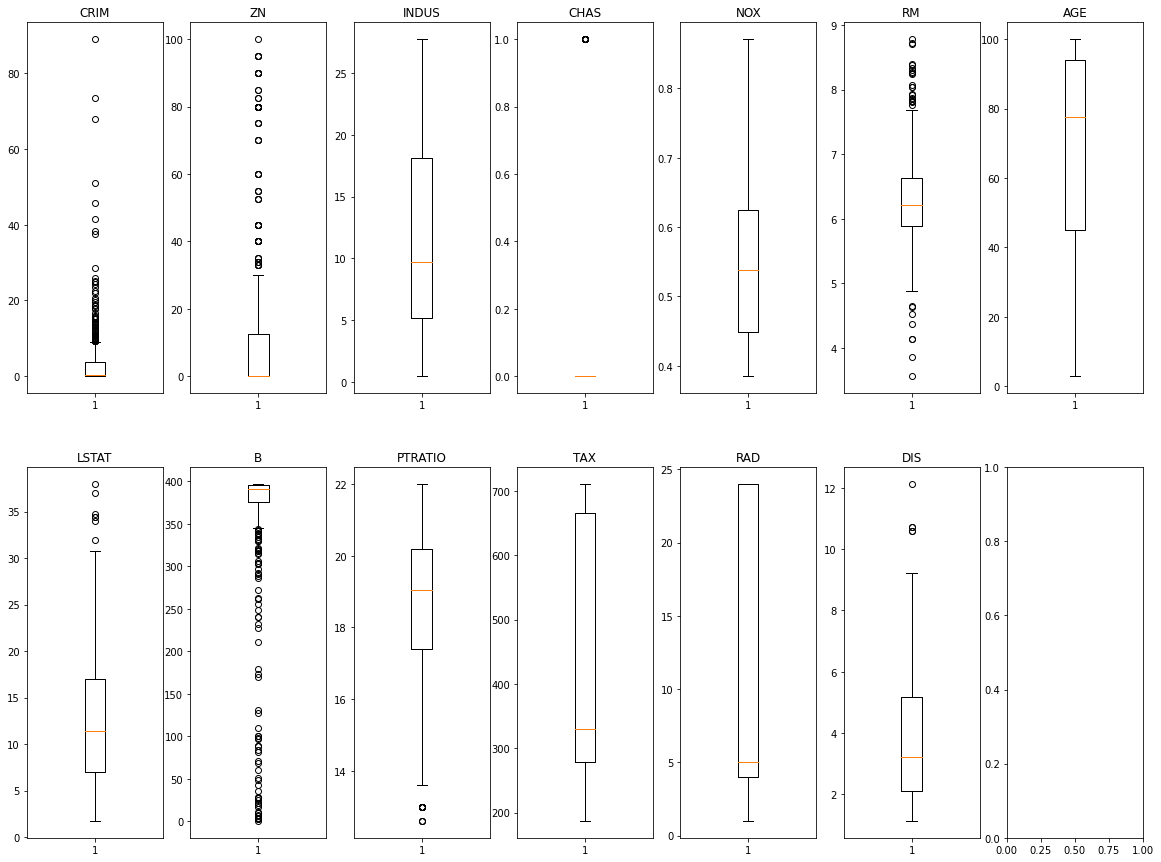

In [100]:
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(2,7)
for i in range(data['data'].shape[1]):
    if i < 7:
        axs[0,i].boxplot([data['data'][:,i]])
        axs[0,i].set_title(data['feature_names'][i])
    else:
        i_ = 5-i
        axs[1,i_].boxplot([data['data'][:,i]])
        axs[1,i_].set_title(data['feature_names'][i])
plt.show()

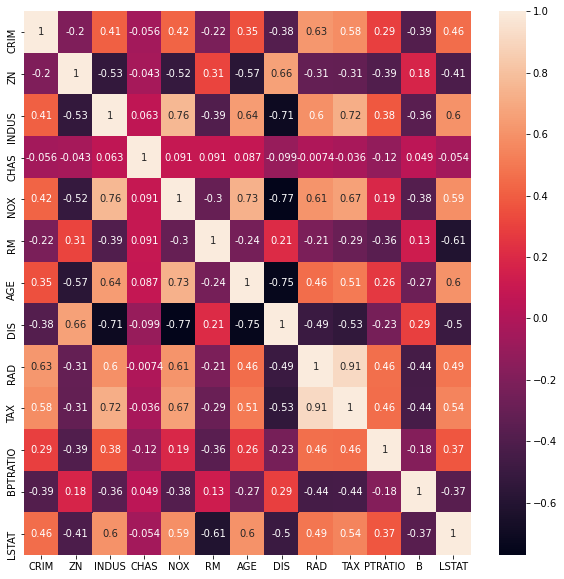

In [84]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [103]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df['CRIM'],df['ZN'],df['INDUS'],df['CHAS'],df['NOX'],
                               df['RM'],df['AGE'],df['DIS'],df['RAD'],df['TAX'],
                               df['PTRATIO'],df['B'],df['LSTAT'])
print(fvalue, pvalue)

3369.851016356049 0.0


#### Temos um p-valor significante (<0.05)

In [14]:
linear_regression_model = LinearRegression()